# 🧠 Stroke Prediction Dataset

This project explores the "Stroke Prediction Dataset" from Kaggle to understand key risk factors and patterns associated with strokes.

### 🎯 Goals:
- Understand which health and demographic factors are linked to stroke
- Perform feature-wise visual analysis
- Build a predictive model using machine learning

### 📦 Dataset Columns:
- `gender`, `age`, `hypertension`, `heart_disease`
- `ever_married`, `work_type`, `Residence_type`
- `avg_glucose_level`, `bmi`, `smoking_status`, `stroke`

In [ ]:
import pandas as pd

df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Check dataset shape and column types
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Unique values in each column
print("\nUnique values:\n", df.nunique())

Shape: (5110, 12)

Data Types:
 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Missing values:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Unique values:
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   41

In [ ]:
# Drop the ID column
df = df.drop(columns=['id'])

# Check class distribution of the target
df['stroke'].value_counts(normalize=True)

,proportion
stroke,
0,0.951272
1,0.048728


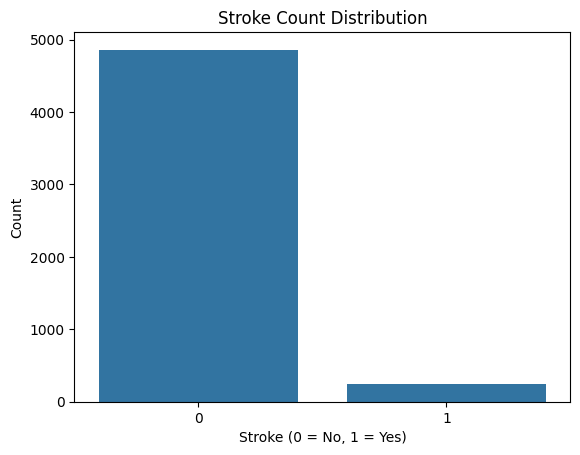

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='stroke', data=df)
plt.title("Stroke Count Distribution")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")

plt.savefig("stroke_distribution.png")  # Saves in current Colab session

plt.show()

### 🧠 Stroke Outcome Distribution & Class Imbalance

The dataset is highly imbalanced in terms of stroke occurrence.

Only **4.87%** of patients had a stroke (`stroke = 1`), while **95.13%** did not (`stroke = 0`).

This is visualized in the bar chart above:

📊 **Class Imbalance Insight:**  
The stroke class is underrepresented, which means a model that always predicts "no stroke" would still be ~95% accurate — but it would completely miss the minority class (stroke patients).  
To address this, we’ll need to:
- Avoid using accuracy as the only evaluation metric
- Monitor **precision**, **recall**, and **F1-score**
- Consider handling imbalance using techniques like:
  - Oversampling (`SMOTE`, `RandomOverSampler`)
  - Undersampling
  - Class weight adjustment in models

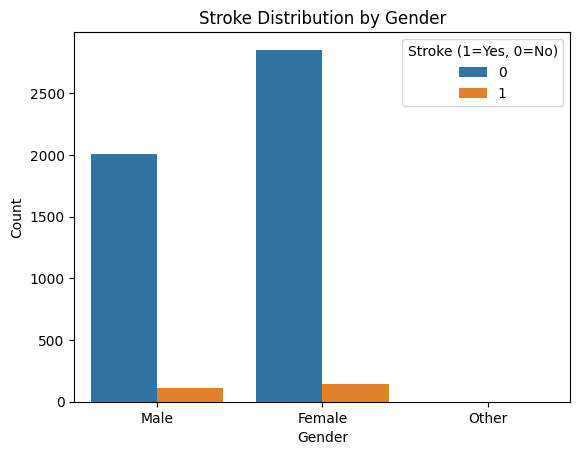

In [ ]:


sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Stroke Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke (1=Yes, 0=No)')
plt.show()

### Stroke Distribution by Gender

This chart breaks down stroke occurrences by gender.

- The dataset is skewed toward **female** participants.
- Stroke cases are present in both **male** and **female** groups in similar proportions.
- The **"Other"** gender category has very few records — likely not enough data to infer meaningful patterns.

This suggests gender alone may not be a strong predictor of stroke, but it’s still useful to keep for modeling.

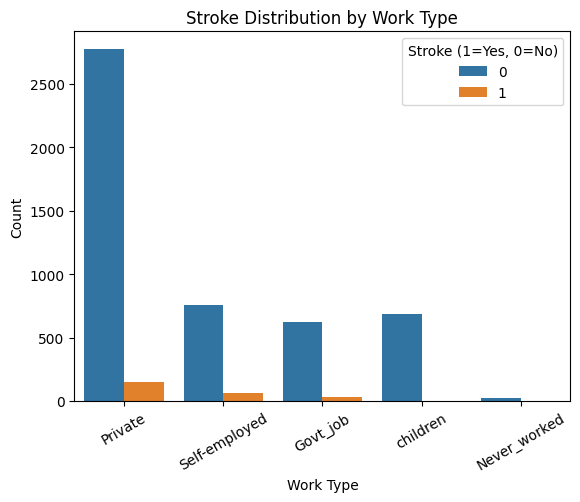

In [ ]:
sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Stroke Distribution by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Stroke (1=Yes, 0=No)')

plt.savefig("work_type_stroke_distribution.png")  # Saves in current Colab session
plt.show()

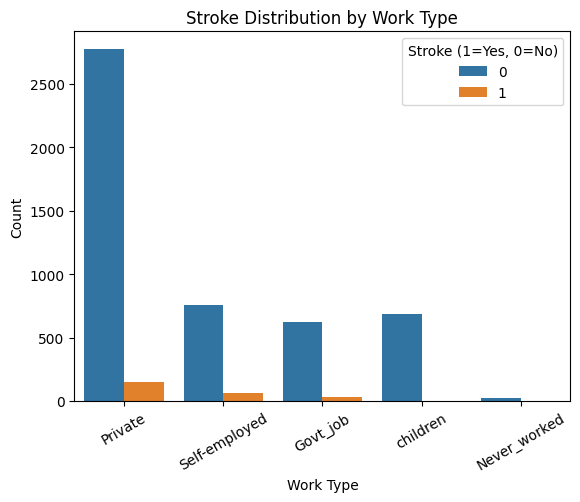

In [ ]:
#Stroke distribution by work type

sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Stroke Distribution by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Stroke (1=Yes, 0=No)')

plt.savefig("work_type_stroke_distribution.png")  # Saves in current Colab session
plt.show()

### Stroke Distribution by Work Type

The above chart shows how stroke occurrences vary across different work types.

- Most people in the dataset are **Private sector** employees, followed by **Self-employed**.
- The highest proportion of stroke cases appears in the **Self-employed** category.
- Very few strokes are observed among **children** — expected, as they're likely younger.

This insight suggests that work-related lifestyle factors could influence stroke risk.

In [ ]:
# Proportion of stroke cases within each work_type
proportion_by_work = df[df['stroke'] == 1]['work_type'].value_counts() / df['work_type'].value_counts()
proportion_by_work = proportion_by_work.sort_values(ascending=False)

print(proportion_by_work)

work_type
Self-employed    0.079365
Private          0.050940
Govt_job         0.050228
children         0.002911
Never_worked          NaN
Name: count, dtype: float64


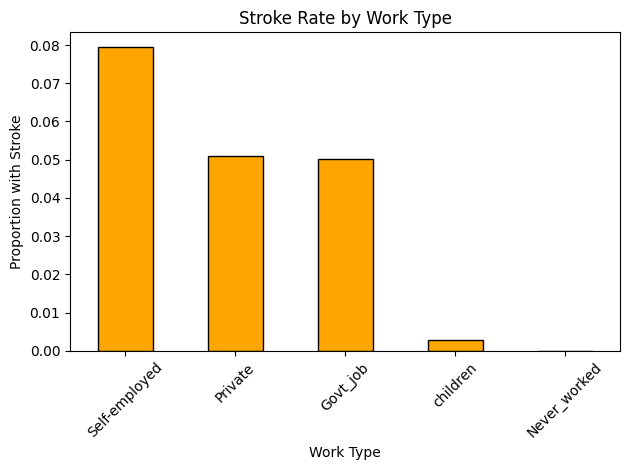

In [ ]:
import matplotlib.pyplot as plt

# Plot proportion of stroke cases
proportion_by_work.plot(kind='bar', color='orange', edgecolor='black')

plt.title("Stroke Rate by Work Type")
plt.ylabel("Proportion with Stroke")
plt.xlabel("Work Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("stroke_rate_by_work_type.png")  # Saves in current Colab session
plt.show()

### Stroke Rate by Work Type

While the absolute number of strokes is highest among people in private jobs (as seen in the count plot), the **stroke *rate*** is highest among the **self-employed** group. This means a larger **proportion** of self-employed people experienced strokes compared to other work types, despite being fewer in number overall.

Understanding proportions helps highlight hidden risks that total counts can miss.


Although the total number of stroke cases is highest among individuals in private jobs (due to their larger population), when adjusting for group size, the **self-employed** have the **highest proportion of stroke cases (~7.9%)**.

This highlights the importance of analyzing proportions instead of just raw counts when exploring risk factors.

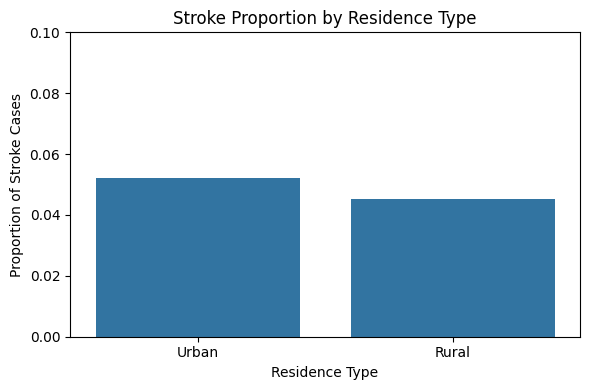

In [ ]:
# Group by Residence Type and calculate stroke proportion
residence_stroke = df.groupby('Residence_type')['stroke'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=residence_stroke.index, y=residence_stroke.values)
plt.title('Stroke Proportion by Residence Type')
plt.ylabel('Proportion of Stroke Cases')
plt.xlabel('Residence Type')
plt.ylim(0, 0.1)
plt.tight_layout()
plt.savefig("stroke_rate_by_residence_type.png")  # Saves in current Colab session
plt.show()

### Stroke Distribution by Residence Type

This chart shows the proportion of stroke cases among Urban and Rural residents.

- **Urban residents** have a slightly higher proportion of stroke cases than rural ones.
- However, the difference is **not very large**, suggesting location may not be a strong standalone risk factor.

This insight can help refine public health messaging across different regions.

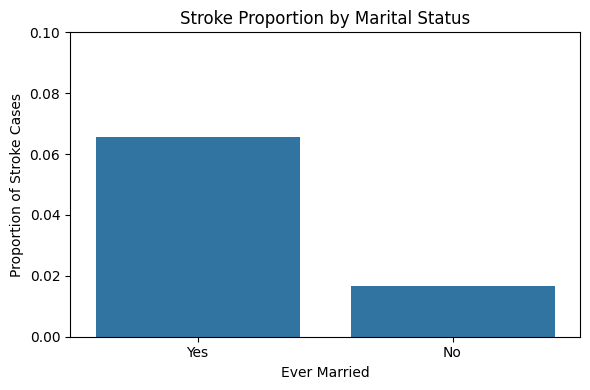

In [ ]:
# Group by marital status and calculate stroke proportion
marital_stroke = df.groupby('ever_married')['stroke'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=marital_stroke.index, y=marital_stroke.values)
plt.title('Stroke Proportion by Marital Status')
plt.ylabel('Proportion of Stroke Cases')
plt.xlabel('Ever Married')
plt.ylim(0, 0.1)
plt.tight_layout()
plt.show()

### Stroke Distribution by Marital Status

This chart compares stroke occurrence between people who have ever been married and those who haven't.

- Individuals who **have been married** show a noticeably **higher stroke proportion**.
- This may reflect **age** or **lifestyle differences**, as married people tend to be older on average.

This feature might indirectly signal other influential factors like age or stress.


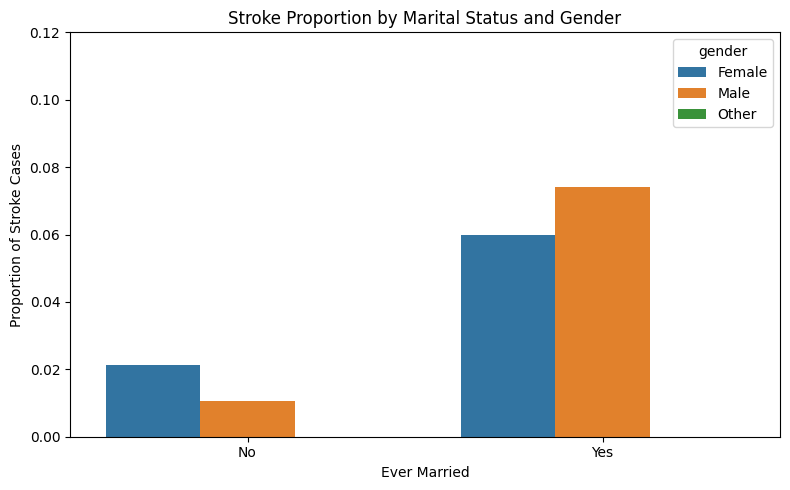

In [ ]:
# Create a grouped dataframe
marital_gender_stroke = df.groupby(['ever_married', 'gender'])['stroke'].mean().reset_index()

# Plot it
plt.figure(figsize=(8, 5))
sns.barplot(data=marital_gender_stroke, x='ever_married', y='stroke', hue='gender')
plt.title('Stroke Proportion by Marital Status and Gender')
plt.ylabel('Proportion of Stroke Cases')
plt.xlabel('Ever Married')
plt.ylim(0, 0.12)
plt.tight_layout()
plt.show()

### Stroke Distribution by Marital Status and Gender

This chart breaks down stroke proportions by both marital status and gender:

- Among those who have **ever been married**, **males** show a **higher proportion** of stroke than females.
- Among those who **have never been married**, the stroke proportion is **lower overall**, but **female stroke risk slightly increases** compared to their married counterparts.

This insight might reflect **gender-based health behaviors**, **stress patterns**, or even **biological vulnerability**.

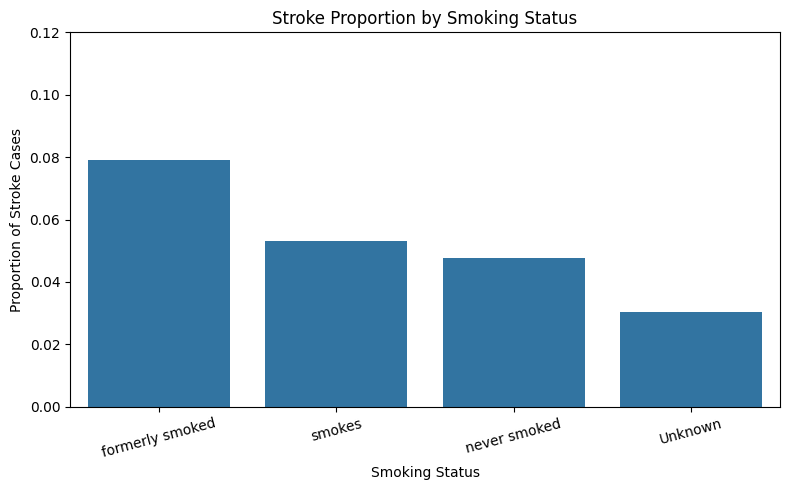

In [ ]:
# Calculate stroke proportion by smoking status
smoking_stroke = df.groupby('smoking_status')['stroke'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=smoking_stroke.index, y=smoking_stroke.values)
plt.title('Stroke Proportion by Smoking Status')
plt.ylabel('Proportion of Stroke Cases')
plt.xlabel('Smoking Status')
plt.ylim(0, 0.12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Stroke Distribution by Smoking Status

This chart compares stroke risk across different smoking categories:

- **Formerly smoked** individuals show the **highest stroke proportion** — possibly due to lingering effects of past smoking.
- **Current smokers** also show elevated risk, but slightly lower than former smokers in this dataset.
- **Never smoked** individuals have a relatively lower risk.
- **Unknown** category could include missing or unrecorded data and should be treated cautiously.

This suggests that **past exposure to smoking** may have long-term health consequences, even after quitting.

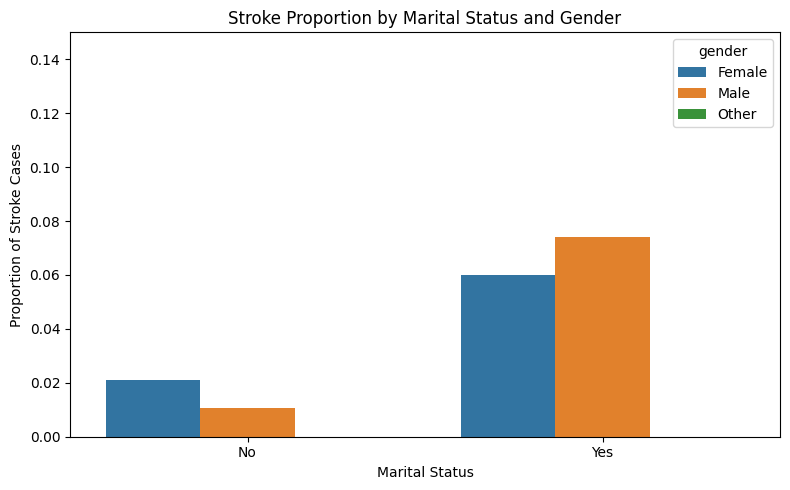

In [ ]:
# Group data
grouped = df.groupby(['ever_married', 'gender'])['stroke'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='ever_married', y='stroke', hue='gender')
plt.title('Stroke Proportion by Marital Status and Gender')
plt.ylabel('Proportion of Stroke Cases')
plt.xlabel('Marital Status')
plt.ylim(0, 0.15)
plt.tight_layout()
plt.show()

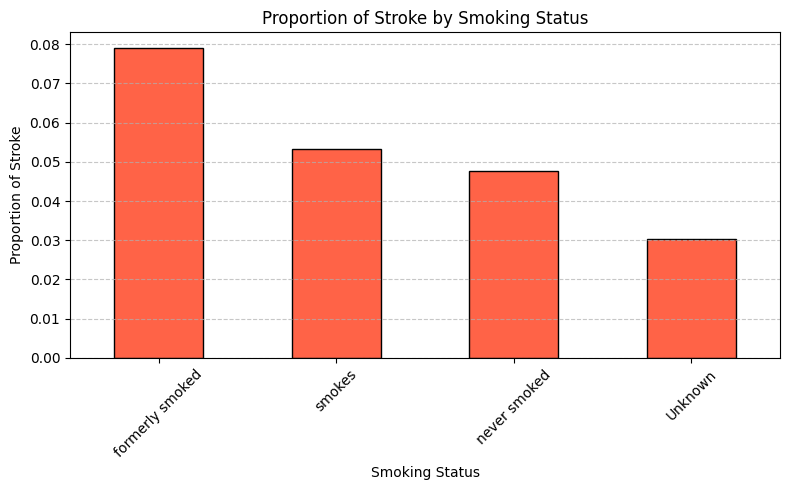

In [ ]:
# Create proportion table
smoking_dist = df.groupby('smoking_status')['stroke'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
smoking_dist.plot(kind='bar', color='tomato', edgecolor='black')
plt.title('Proportion of Stroke by Smoking Status')
plt.ylabel('Proportion of Stroke')
plt.xlabel('Smoking Status')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("proportion_of_stroke_by_smoking_status.png")  # Saves in current Colab session
plt.show()

### 🚬 Stroke Risk by Smoking Status

This chart shows the proportion of patients who experienced a stroke within each smoking category. The most affected group appears to be the formerly smoked, indicating a potential correlation between smoking habits and stroke risk.

It's important to note that **smoking history may interact with other risk factors** like age and heart disease, which we may explore in future analysis.

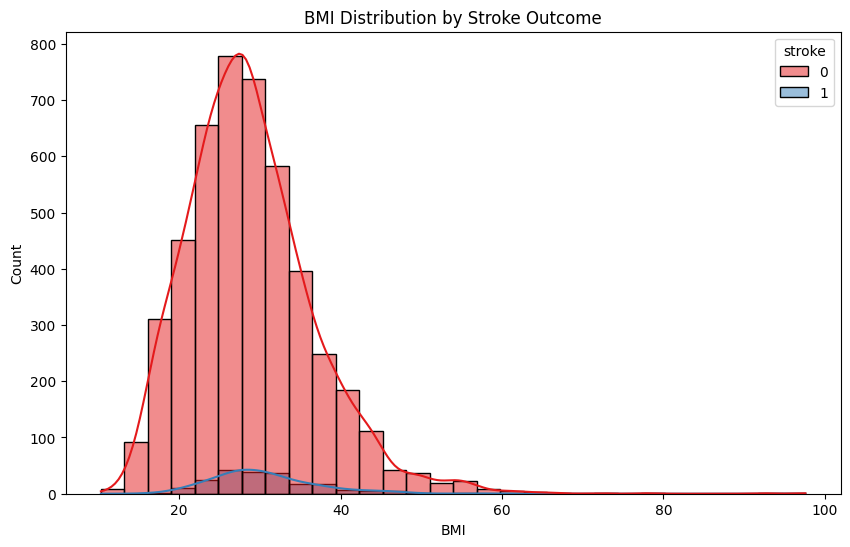

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='stroke', kde=True, bins=30, palette='Set1')
plt.title('BMI Distribution by Stroke Outcome')
plt.xlabel('BMI')
plt.ylabel('Count')

plt.savefig("bmi_distribution_by_stroke.png")  # Saves in current Colab session
plt.show()

### BMI vs Stroke Distribution

The histogram above shows the distribution of BMI among patients with and without stroke.

- The majority of patients (stroke and non-stroke) have BMI values between 20 and 35.
- Stroke cases appear slightly more concentrated in the higher BMI range (25+).
- However, due to class imbalance, the overall trend must be interpreted with caution.

This suggests that **higher BMI might be mildly associated with stroke risk**, though further modeling is needed to confirm this.

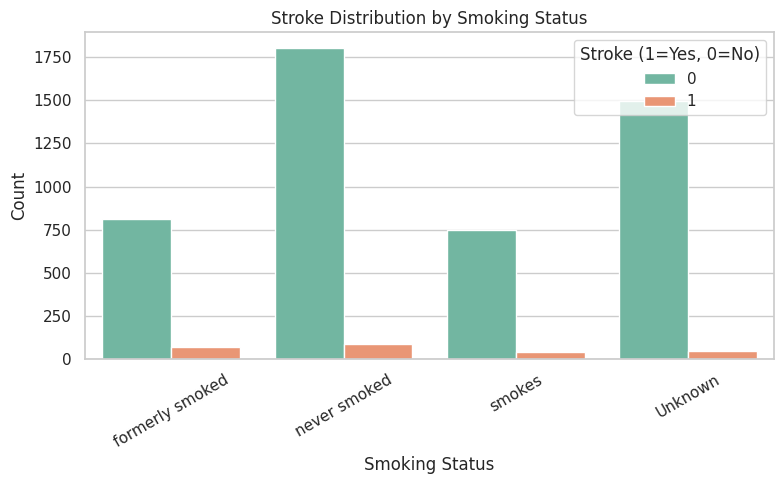

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Create grouped countplot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="smoking_status", hue="stroke", palette="Set2")

# Add labels and title
plt.title("Stroke Distribution by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.legend(title="Stroke (1=Yes, 0=No)")

# Rotate x-axis labels for readability
plt.xticks(rotation=30)

# Show plot
plt.tight_layout()
plt.show()

## Stroke Distribution by Smoking Status

This chart compares the number of stroke and non-stroke cases across four smoking categories: **formerly smoked**, **never smoked**, **smokes**, and **unknown**.

### 🔍 Key Observations:
- The **"never smoked"** group has the highest number of total individuals, which is expected.
- Interestingly, the **"formerly smoked"** category shows a slightly higher proportion of stroke cases compared to "never smoked" or "smokes."
- The **"smokes"** group has relatively fewer stroke cases despite public health expectations, which might be due to younger individuals or confounding health behaviors.
- The **"unknown"** category also contains stroke cases and should not be ignored.

### 💡 Insight:
The presence of stroke cases across **all** smoking categories suggests that while smoking is a known health risk, **stroke risk is multifactorial** and can't be attributed to smoking status alone in this dataset.

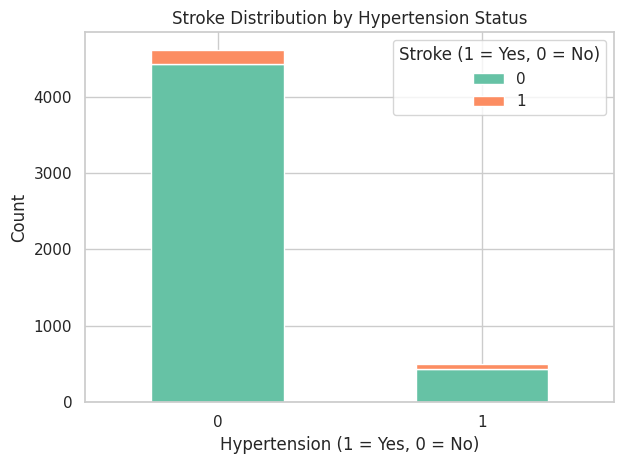

In [ ]:
# Create a crosstab for visualization
hypertension_crosstab = pd.crosstab(df['hypertension'], df['stroke'])

# Bar plot
sns.set_style("whitegrid")
hypertension_crosstab.plot(kind='bar', stacked=True, color=['#66c2a5','#fc8d62'])

plt.title("Stroke Distribution by Hypertension Status")
plt.xlabel("Hypertension (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.legend(title="Stroke (1 = Yes, 0 = No)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 🩺 Stroke vs Hypertension

This chart compares stroke occurrence in individuals **with and without hypertension**.

### 🔍 Key Observations:
- People **with hypertension** have a **higher rate of stroke** compared to those without.
- Although more people in the dataset don't have hypertension, those with it have a noticeably larger share of stroke cases.
- This suggests that **hypertension is a significant risk factor** for stroke.

### 💡 Insight:
This aligns with clinical understanding — **high blood pressure is one of the top risk factors for stroke**, and it’s important to flag it in predictive modeling.

In [ ]:
# Group stroke counts by residence type
residence_stroke_ratio = df.groupby('Residence_type')['stroke'].mean()
print(residence_stroke_ratio)

Residence_type
Rural    0.045346
Urban    0.052003
Name: stroke, dtype: float64


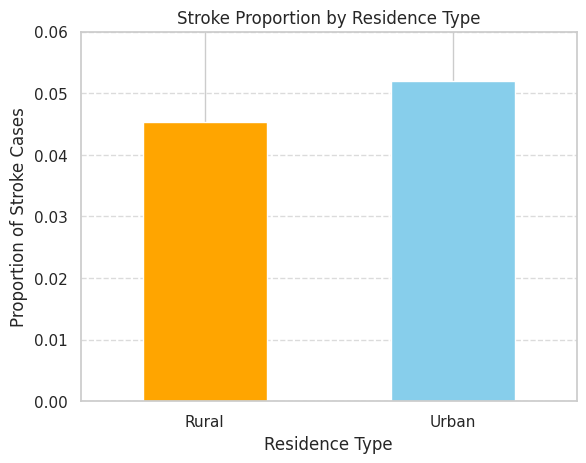

In [ ]:


residence_stroke_ratio.plot(kind='bar', color=['orange', 'skyblue'])
plt.title('Stroke Proportion by Residence Type')
plt.ylabel('Proportion of Stroke Cases')
plt.xlabel('Residence Type')
plt.xticks(rotation=0)
plt.ylim(0, 0.06)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

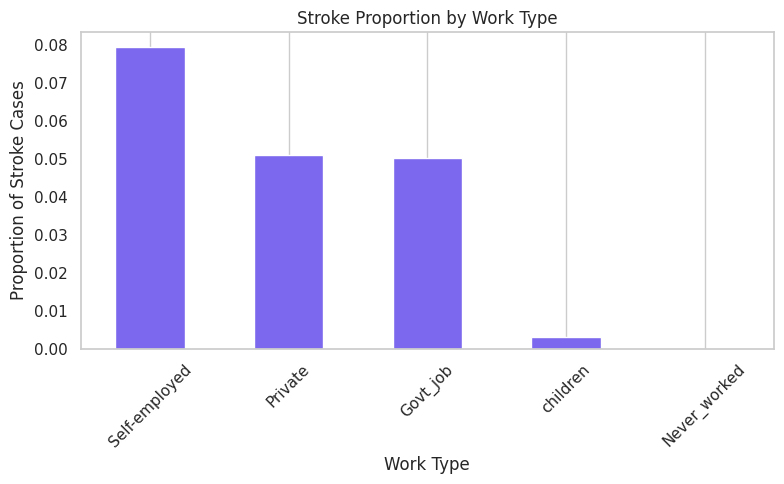

work_type
Self-employed    0.079365
Private          0.050940
Govt_job         0.050228
children         0.002911
Never_worked     0.000000
Name: stroke, dtype: float64


In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Proportion of stroke by work_type
stroke_by_work = df.groupby("work_type")["stroke"].mean().sort_values(ascending=False)

# Plot
stroke_by_work.plot(kind="bar", color="mediumslateblue", figsize=(8,5))
plt.title("Stroke Proportion by Work Type")
plt.xlabel("Work Type")
plt.ylabel("Proportion of Stroke Cases")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Display the values
print(stroke_by_work)

## 🏢 Stroke Proportion by Work Type

This bar chart compares the proportion of stroke cases across various work types.

### 🔍 Key Observations:
- The **Self-employed** group has the **highest stroke proportion (~7.9%)**, making it the most at-risk category.
- **Private** and **Govt_job** employees follow closely with ~5% stroke proportions.
- The **children** category shows minimal stroke cases, as expected.
- The **Never_worked** category has no reported stroke cases.

### 💡 Insight:
Self-employed individuals may face greater stress, irregular routines, or less access to healthcare, possibly contributing to a higher risk of stroke. This highlights the importance of examining occupational health risks in stroke prevention.

In [ ]:
# Fill missing BMI values with the median BMI
bmi_median = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(bmi_median)

# Check if any missing values remain
print("Missing values in bmi:", df['bmi'].isnull().sum())

Missing values in bmi: 0


In [ ]:
# Drop 'id' column
# df = df.drop('id', axis=1) # This line is removed as 'id' is already dropped

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Show shape and sample
print("Shape after encoding:", df_encoded.shape)
df_encoded.head()

Shape after encoding: (5110, 17)


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False


In [ ]:
# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# Separate features (X) and target (y)
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

# Final check
print("Features shape:", X.shape)
print("Target shape:", y.shape)
X.head()

Features shape: (5110, 16)
Target shape: (5110,)


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,0,1,0,1,0,0,1,1,0,0
1,61,0,0,202,28,0,0,1,0,0,1,0,0,0,1,0
2,80,0,1,105,32,1,0,1,0,1,0,0,0,0,1,0
3,49,0,0,171,34,0,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174,24,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training features and transform
X_scaled = scaler.fit_transform(X)

# Optional: Check scaled output
print("Scaled features shape:", X_scaled.shape)

Scaled features shape: (5110, 16)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Confirm shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train stroke rate:", y_train.mean().round(4))
print("y_test stroke rate:", y_test.mean().round(4))

X_train shape: (4088, 16)
X_test shape: (1022, 16)
y_train stroke rate: 0.0487
y_test stroke rate: 0.0489


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.952054794520548

Confusion Matrix:
 [[972   0]
 [ 49   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022



In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Show new class distribution
print("Original training target distribution:\n", y_train.value_counts(normalize=True))
print("\nResampled training target distribution:\n", y_train_resampled.value_counts(normalize=True))

# Show shapes
print("\nNew shapes after SMOTE:")
print("X_train_resampled:", X_train_resampled.shape)
print("y_train_resampled:", y_train_resampled.shape)

Original training target distribution:
 stroke
0    0.951321
1    0.048679
Name: proportion, dtype: float64

Resampled training target distribution:
 stroke
0    0.5
1    0.5
Name: proportion, dtype: float64

New shapes after SMOTE:
X_train_resampled: (7778, 16)
y_train_resampled: (7778,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Train the model on the resampled training data
model_smote = LogisticRegression(max_iter=1000, random_state=42)
model_smote.fit(X_train_resampled, y_train_resampled)

# 2. Predict on the original test set
y_pred_smote = model_smote.predict(X_test)

# 3. Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\n🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_smote))

✅ Accuracy: 0.7485322896281801

🧾 Confusion Matrix:
 [[725 247]
 [ 10  40]]

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.75      0.82      1022



In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# 2. Predict on test data
y_pred_rf = rf_model.predict(X_test)

# 3. Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# 4. Display results
print(f"🌲 Random Forest Accuracy: {accuracy_rf:.4f}")
print("\n📊 Confusion Matrix:\n", cm_rf)
print("\n📈 Classification Report:\n", report_rf)

🌲 Random Forest Accuracy: 0.9178

📊 Confusion Matrix:
 [[931  41]
 [ 43   7]]

📈 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.15      0.14      0.14        50

    accuracy                           0.92      1022
   macro avg       0.55      0.55      0.55      1022
weighted avg       0.92      0.92      0.92      1022



In [31]:
import sklearn
import joblib
import pandas as pd

print("scikit-learn version:", sklearn.__version__)
print("joblib version:", joblib.__version__)
print("pandas version:", pd.__version__)

scikit-learn version: 1.6.1
joblib version: 1.5.1
pandas version: 2.2.2


In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib

# Step 1: Recreate the scaler and scaled X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply SMOTE to the training data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Train Random Forest on resampled data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_resampled, y_train_resampled)

# Step 4: Save model and scaler
joblib.dump(rf_smote, 'random_forest_stroke_model.joblib')
joblib.dump(scaler, 'standard_scaler.joblib')

['standard_scaler.joblib']

In [35]:
# Step 4: Save model and scaler
joblib.dump(rf_smote, 'random_forest_stroke_model.joblib')
joblib.dump(scaler, 'standard_scaler.joblib')

['standard_scaler.joblib']